<a href="https://colab.research.google.com/github/kiaerii/lab.subbota/blob/main/%D0%94%D0%BE%D0%B1%D1%80%D0%BE_%D0%BF%D0%BE%D0%B6%D0%B0%D0%BB%D0%BE%D0%B2%D0%B0%D1%82%D1%8C_%D0%B2_Colab!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача 1: Анализ данных о студентах (ООП + работа с файлами)

Условие:

    Создайте класс Student с атрибутами: name (имя), group (группа), grades (список оценок).
    Реализуйте метод average_grade(), который возвращает средний балл студента.
    Реализуйте метод is_excellent(), который возвращает True, если средний балл студента выше или равен 4.5, и False в противном случае.
    В основной программе прочитайте данные из файла students.txt (формат: Имя;Группа;Оценка1,Оценка2,Оценка3), создайте список объектов Student.
    Запишите в файл excellent_students.txt информацию о всех студентах-отличниках (каждая строка: Имя из файла - Группа).
    Выведите на экран средний балл для каждой группы.

In [22]:
# Определение класса Student для представления студента
class Student:
    # Конструктор класса, инициализирует атрибуты объекта
    def __init__(self, name, group, grades):
        self.name = name
        self.group = group
        self.grades = grades

    # Метод для вычисления среднего балла(Если есть оценки вычисляем среднее, иначе возвращаем 0)
    def average_grade(self):

        return sum(self.grades) / len(self.grades) if self.grades else 0

    # Метод для проверки, является ли студент отличником(Возвращает True если средний балл >= 4.5)
    def is_excellent(self):

        return self.average_grade() >= 4.5

# Функция для чтения данных о студентах из файла
def read_students_from_file(filename):
    students = []  # Создаем пустой список для хранения объектов Student
    try:
        # Открываем файл для чтения с указанием кодировки UTF-8
        with open(filename, 'r', encoding='utf-8') as file:
            # Читаем файл построчно
            for line in file:
                line = line.strip()  # Убираем пробелы и переносы строк
                if line:  # Проверяем, что строка не пустая
                    parts = line.split(';')  # Разделяем строку по точкам с запятой
                    if len(parts) == 3:  # Проверяем, что строка содержит 3 части
                        name = parts[0]    # Первая часть - имя
                        group = parts[1]   # Вторая часть - группа
                        # Третью часть преобразуем в список целых чисел
                        grades = list(map(int, parts[2].split(',')))
                        # Создаем объект Student и добавляем в список
                        students.append(Student(name, group, grades))
    except FileNotFoundError:
        # Обрабатываем случай, когда файл не найден
        print(f"Файл {filename} не найден")
    return students  # Возвращаем список студентов

# Функция для записи отличников в файл
def write_excellent_students(students, filename):
    # Открываем файл для записи
    with open(filename, 'w', encoding='utf-8') as file:
        for student in students:  # Перебираем всех студентов
            if student.is_excellent():  # Проверяем, является ли студент отличником
                # Записываем информацию в файл
                file.write(f"{student.name} - {student.group}\n")

# Функция для вычисления среднего балла по группам
def calculate_group_averages(students):
    group_grades = {}  # Создаем словарь для хранения оценок по группам

    for student in students:  # Перебираем всех студентов
        if student.group not in group_grades:  # Если группы еще нет в словаре
            group_grades[student.group] = []  # Создаем пустой список для оценок
        # Добавляем средний балл студента в список его группы
        group_grades[student.group].append(student.average_grade())

    group_averages = {}  # Создаем словарь для средних значений по группам
    for group, grades in group_grades.items():  # Перебираем группы и их оценки
        # Вычисляем среднее арифметическое оценок группы
        group_averages[group] = sum(grades) / len(grades)

    return group_averages  # Возвращаем словарь с средними по группам

# Основная программа
if __name__ == "__main__":
    # Чтение данных из файла и создание списка объектов Student
    students = read_students_from_file("students.txt")

    # Запись отличников в файл
    write_excellent_students(students, "excellent_students.txt")

    # Вычисление среднего балла по группам
    group_averages = calculate_group_averages(students)
    print("Средний балл по группам:")
    for group, avg in group_averages.items():  # Перебираем группы и их средние
        print(f"Группа {group}: {avg:.2f}")  # Выводим с округлением до 2 знаков

Файл students.txt не найден
Средний балл по группам:


Задача 2: Обработка логов с помощью регулярных выражений

Условие:
Дан многострочный текст-лог (например, вывод команды или журнал работы сервера). Напишите скрипт, который используя регулярные выражения:

    Находит все IPv4 адреса.
    Находит все временные метки в формате YYYY-MM-DD HH:MM:SS.
    Находит все слова, написанные в UPPERCASE.
    Задание повышенной сложности: Заменяет все найденные email-адреса на [EMAIL PROTECTED].

In [7]:
import re  # Импортируем модуль для работы с регулярными выражениями

def analyze_logs(log_text):
    # Паттерн для поиска IPv4 адресов (4 числа от 0 до 255, разделенные точками)
    ip_pattern = r'\b(?:\d{1,3}\.){3}\d{1,3}\b'
    # Находим все IPv4 адреса в тексте
    ip_addresses = re.findall(ip_pattern, log_text)

    # Паттерн для временных меток формата YYYY-MM-DD HH:MM:SS
    timestamp_pattern = r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}'
    # Находим все временные метки в тексте
    timestamps = re.findall(timestamp_pattern, log_text)

    # Паттерн для слов в UPPERCASE (только заглавные буквы, цифры и подчеркивания)
    uppercase_pattern = r'\b[A-Z][A-Z0-9_]+\b'
    # Находим все слова в верхнем регистре
    uppercase_words = re.findall(uppercase_pattern, log_text)

    # Паттерн для email-адресов
    email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
    # Заменяем все email-адреса на защищенный текст
    protected_log = re.sub(email_pattern, '[EMAIL PROTECTED]', log_text)

    # Возвращаем словарь с результатами
    return {
        'ip_addresses': ip_addresses,
        'timestamps': timestamps,
        'uppercase_words': uppercase_words,
        'protected_log': protected_log
    }

# Пример использования
log_example = """
2024-01-15 10:30:45 User LOGIN from 192.168.1.1
2024-01-15 10:31:02 ERROR: Connection failed to 10.0.0.5
USER admin@example.com attempted ADMIN access
SECURITY ALERT: Multiple FAILED attempts from 172.16.254.1
"""

# Вызываем функцию анализа логов
results = analyze_logs(log_example)
print("IPv4 адреса:", results['ip_addresses'])
print("Временные метки:", results['timestamps'])
print("UPPERCASE слова:", results['uppercase_words'])
print("Лог с защищенными email:")
print(results['protected_log'])

IPv4 адреса: ['192.168.1.1', '10.0.0.5', '172.16.254.1']
Временные метки: ['2024-01-15 10:30:45', '2024-01-15 10:31:02']
UPPERCASE слова: ['LOGIN', 'ERROR', 'USER', 'ADMIN', 'SECURITY', 'ALERT', 'FAILED']
Лог с защищенными email:

2024-01-15 10:30:45 User LOGIN from 192.168.1.1
2024-01-15 10:31:02 ERROR: Connection failed to 10.0.0.5
USER [EMAIL PROTECTED] attempted ADMIN access
SECURITY ALERT: Multiple FAILED attempts from 172.16.254.1



Задача 3: Валидация и преобразование данных с Pandas

Условие:

    Создайте DataFrame df из словаря с данными о продажах. В данных намеренно есть пропуски (NaN) и выбросы.
    Заполните пропуски в столбце 'Цена' медианным значением.
    Найдите и удалите строки, в которых количество ('Количество') является выбросом (например, меньше 1 или больше 1000).
    Создайте новый столбец 'Общая_стоимость' = 'Цена' * 'Количество'.
    Сгруппируйте данные по 'Товар' и посчитайте суммарную выручку по каждому товару.
    Постройте столбчатую диаграмму (bar plot) для полученной выручки по товарам.

Исходные данные:
       Товар  Цена  Количество
0     Яблоки    50         100
1     Бананы    30         150
2  Апельсины    80          -5
3      Груши    60          80
4     Яблоки    55         120
5     Бананы    32        2000
6       None    75          90

Обработанные данные:
    Товар  Цена  Количество  Общая_стоимость
0  Яблоки    50         100             5000
1  Бананы    30         150             4500
3   Груши    60          80             4800
4  Яблоки    55         120             6600
6    None    75          90             6750

Выручка по товарам:
Товар
Бананы     4500
Груши      4800
Яблоки    11600
Name: Общая_стоимость, dtype: int64


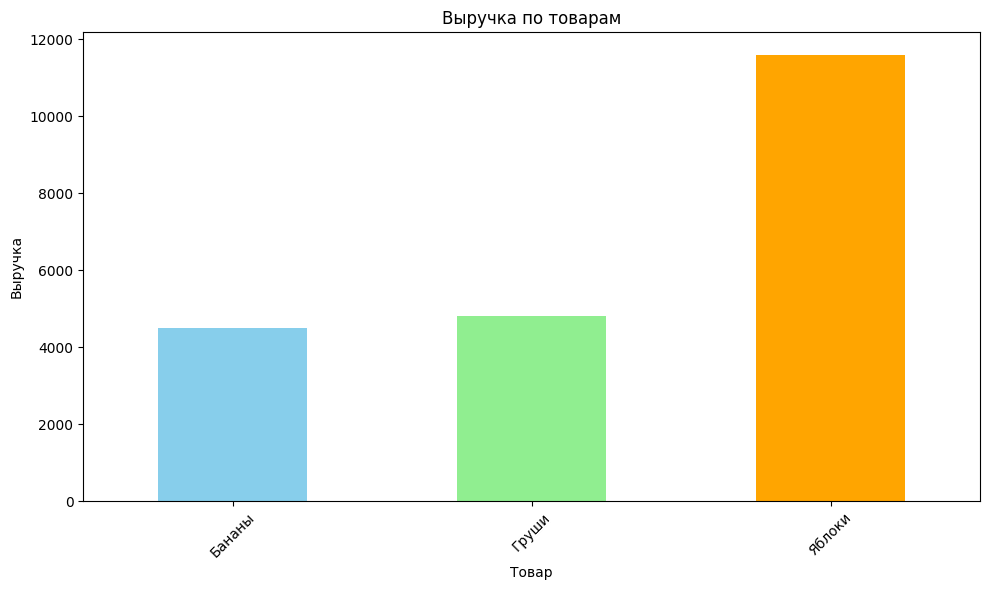

In [8]:
import pandas as pd  # Импортируем pandas для работы с табличными данными
import numpy as np   # Импортируем numpy для математических операций
import matplotlib.pyplot as plt  # Импортируем matplotlib для построения графиков

def process_sales_data():
    # Создаем словарь с данными о продажах
    data = {
        'Товар': ['Яблоки', 'Бананы', 'Апельсины', 'Груши', 'Яблоки', 'Бананы', None],
        'Цена': [50, 30, 80, 60, 55, 32, 75],
        'Количество': [100, 150, -5, 80, 120, 2000, 90]  # Есть выбросы: -5 и 2000
    }

    # Создаем DataFrame из словаря
    df = pd.DataFrame(data)
    print("Исходные данные:")
    print(df)

    # Заполняем пропуски в столбце 'Цена' медианным значением
    df['Цена'] = df['Цена'].fillna(df['Цена'].median())

    # Удаляем строки с выбросами в количестве (меньше 1 или больше 1000)
    df = df[(df['Количество'] >= 1) & (df['Количество'] <= 1000)]

    # Создаем новый столбец 'Общая_стоимость' как произведение цены и количества
    df['Общая_стоимость'] = df['Цена'] * df['Количество']

    # Группируем данные по товару и считаем суммарную выручку
    revenue_by_product = df.groupby('Товар')['Общая_стоимость'].sum()

    print("\nОбработанные данные:")
    print(df)
    print("\nВыручка по товарам:")
    print(revenue_by_product)

    # Создаем график размером 10x6 дюймов
    plt.figure(figsize=(10, 6))
    # Строим столбчатую диаграмму с разными цветами
    revenue_by_product.plot(kind='bar', color=['skyblue', 'lightgreen', 'orange', 'pink'])
    plt.title('Выручка по товарам')  # Заголовок графика
    plt.xlabel('Товар')              # Подпись оси X
    plt.ylabel('Выручка')            # Подпись оси Y
    plt.xticks(rotation=45)          # Поворачиваем подписи на 45 градусов
    plt.tight_layout()               # Автоматическая настройка layout
    plt.show()                       # Показываем график

# Вызываем функцию обработки данных
process_sales_data()

Задача 4: Научные вычисления с NumPy

Условие:

    Сгенерируйте два случайных двумерных массива (матрицы) A и B размером 5x5 с целыми числами в диапазоне от 1 до 10.

    Вычислите:

        Поэлементное произведение матриц.
        Матричное произведение.
        Определитель матрицы A.
        Транспонированную матрицу B.
        Обратную матрицу для A (если это возможно, иначе вывести сообщение).

    Решите систему линейных уравнений: A * x = C, где C — вектор-столбец сумм строк матрицы A.

In [9]:
import numpy as np  # Импортируем numpy для научных вычислений
from numpy.linalg import det, inv, solve  # Импортируем функции линейной алгебры

def numpy_operations():
    # Устанавливаем seed для воспроизводимости случайных чисел
    np.random.seed(42)
    # Генерируем матрицу A размером 5x5 со случайными целыми числами от 1 до 10
    A = np.random.randint(1, 11, size=(5, 5))
    # Генерируем матрицу B такого же размера
    B = np.random.randint(1, 11, size=(5, 5))

    print("Матрица A:")
    print(A)
    print("\nМатрица B:")
    print(B)

    # Поэлементное произведение (каждый элемент A умножается на соответствующий элемент B)
    elementwise_product = A * B
    print("\nПоэлементное произведение A и B:")
    print(elementwise_product)

    # Матричное произведение (стандартное умножение матриц)
    matrix_product = A @ B
    print("\nМатричное произведение A и B:")
    print(matrix_product)

    # Вычисляем определитель матрицы A
    det_A = det(A)
    print(f"\nОпределитель матрицы A: {det_A:.2f}")

    # Транспонируем матрицу B (меняем строки и столбцы местами)
    B_transposed = B.T
    print("\nТранспонированная матрица B:")
    print(B_transposed)

    # Пытаемся найти обратную матрицу для A
    try:
        A_inverse = inv(A)  # Вычисляем обратную матрицу
        print("\nОбратная матрица для A:")
        print(A_inverse)
    except np.linalg.LinAlgError:
        # Если матрица вырожденная (определитель = 0), ловим исключение
        print("\nМатрица A вырожденная, обратной матрицы не существует")

    # Создаем вектор C как сумму строк матрицы A и преобразуем в столбец
    C = np.sum(A, axis=1).reshape(-1, 1)
    try:
        # Решаем систему линейных уравнений A*x = C
        x = solve(A, C)
        print("\nРешение системы A*x = C:")
        print(x)

        # Проверяем решение: умножаем A на найденный x
        check = A @ x
        print("\nПроверка решения (A*x):")
        print(check)
        print("\nИсходный вектор C:")
        print(C)

    except np.linalg.LinAlgError:
        print("Система уравнений не имеет решения")

# Вызываем функцию для демонстрации операций
numpy_operations()

Матрица A:
[[ 7  4  8  5  7]
 [10  3  7  8  5]
 [ 4  8  8  3  6]
 [ 5  2  8  6  2]
 [ 5  1 10  6  9]]

Матрица B:
[[ 1 10  3  7  4]
 [ 9  3  5  3  7]
 [ 5  9  7  2  4]
 [ 9  2 10  9 10]
 [ 5  2  4  7  8]]

Поэлементное произведение A и B:
[[ 7 40 24 35 28]
 [90  9 35 24 35]
 [20 72 56  6 24]
 [45  4 80 54 20]
 [25  2 40 42 72]]

Матричное произведение A и B:
[[163 178 175 171 194]
 [169 198 194 200 209]
 [173 154 162 137 182]
 [127 144 149 125 142]
 [163 173 186 175 199]]

Определитель матрицы A: 2025.00

Транспонированная матрица B:
[[ 1  9  5  9  5]
 [10  3  9  2  2]
 [ 3  5  7 10  4]
 [ 7  3  2  9  7]
 [ 4  7  4 10  8]]

Обратная матрица для A:
[[ 0.72888889 -0.19555556 -0.27555556  0.08444444 -0.29333333]
 [-0.31259259  0.15703704  0.24148148 -0.08296296  0.01333333]
 [ 0.51259259 -0.35703704 -0.17481481  0.28296296 -0.14666667]
 [-1.12296296  0.54518519  0.35407407 -0.17481481  0.37333333]
 [-0.19111111  0.12444444  0.08444444 -0.23555556  0.18666667]]

Решение системы A*x = C:
[[

Задача 5: Комплексная функция с обработкой исключений и лямбдой

Условие:
Напишите функцию safe_apply(func, data), которая:

    Принимает другую функцию func и список data.
    Пытается применить функцию func к каждому элементу списка data.
    Если применение приводит к исключению (например, ValueError, TypeError), элемент добавляется в специальный список errors с указанием типа ошибки.
    Функция возвращает кортеж (results, errors), где results — список успешных результатов, errors — список кортежей (element, exception).
    Продемонстрируйте работу функции, передав ей лямбда-функцию, вычисляющую квадратный корень, и список ['4', '16', 'text', '-25', '9.0'].


In [14]:
import math  # Импортируем математический модуль

def safe_apply(func, data):
    results = []  # Список для успешных результатов
    errors = []   # Список для ошибок

    for element in data:  # Перебираем все элементы входных данных
        try:
            # Пытаемся применить функцию к элементу
            result = func(element)
            results.append(result)  # Если успешно, добавляем результат
        except Exception as e:
            # Если возникло исключение, добавляем информацию об ошибке
            errors.append((element, type(e).__name__))

    # Возвращаем кортеж с результатами и ошибками
    return results, errors

# Демонстрация работы функции
if __name__ == "__main__":
    # Создаем лямбда-функцию для вычисления квадратного корня
    # Лямбда принимает x, преобразует в float и вычисляет квадратный корень
    sqrt_lambda = lambda x: math.sqrt(float(x))

    # Тестовые данные разных типов
    test_data = ['4', '16', 'text', '-25', '9.0']

    # Применяем нашу функцию к тестовым данным
    results, errors = safe_apply(sqrt_lambda, test_data)

    print("Успешные результаты:")
    for i, result in enumerate(results):
        # Выводим исходные данные и полученные результаты
        print(f"  {test_data[i]} -> {result:.2f}")

    print("\nОшибки:")
    for element, error_type in errors:
        # Выводим элементы, вызвавшие ошибки, и типы ошибок
        print(f"  {element} -> {error_type}")

Успешные результаты:
  4 -> 2.00
  16 -> 4.00
  text -> 3.00

Ошибки:
  text -> ValueError
  -25 -> ValueError
